# Capture the unprecedentedness of the 2023 MHW

In [1]:
import xarray as xr
import json
import gcsfs
import matplotlib.pyplot as plt

In [2]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

era = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_updated.zarr'))
era

<xarray.Dataset> Size: 29MB
Dimensions:     (time: 5113, theta_bin: 179)
Coordinates:
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
  * time        (time) datetime64[ns] 41kB 2010-01-01 2010-01-02 ... 2023-12-31
Data variables:
    omega_slhf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_sshf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_ssr   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_str   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>

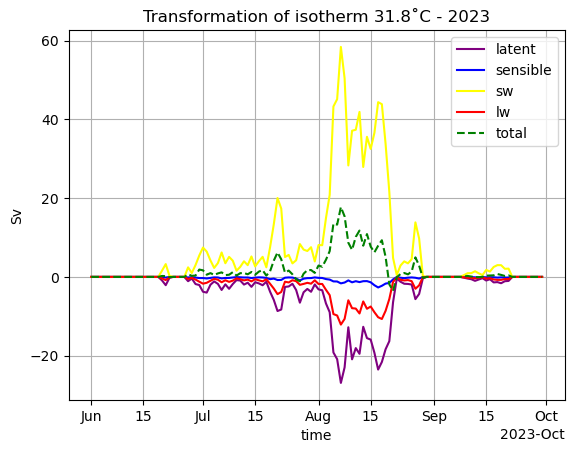

In [13]:
mhw = one_plt_era.sel(time=slice('2023-06', '2023-09'))

(mhw.omega_slhf/1e6).plot(label='latent', color='purple')
(mhw.omega_sshf/1e6).plot(label='sensible', color='blue')
(mhw.omega_ssr/1e6).plot(label='sw', color='yellow')
(mhw.omega_str/1e6).plot(label='lw', color='red')
(mhw/1e6).to_array().sum('variable').plot(label='total', color='green', linestyle='dashed')
plt.legend()
plt.ylabel('Sv')
#plt.ylim(-10,10)
plt.grid()
plt.title('Transformation of isotherm 31.8˚C - 2023');

In [3]:
one_plt_era = era.sel(theta_bin=31.8, method='nearest')

In [54]:
vol_unit = 60 * 60 * 24
areal_unit = (60 * 60 * 24) / 5

In [55]:
vols = one_plt_era * vol_unit #m^3 (volume)
areas = one_plt_era * areal_unit # m^2 (area)

In [56]:
vols

<xarray.Dataset> Size: 205kB
Dimensions:     (time: 5113)
Coordinates:
    theta_bin   float64 8B 31.75
  * time        (time) datetime64[ns] 41kB 2010-01-01 2010-01-02 ... 2023-12-31
Data variables:
    omega_slhf  (time) float64 41kB dask.array<chunksize=(1279,), meta=np.ndarray>
    omega_sshf  (time) float64 41kB dask.array<chunksize=(1279,), meta=np.ndarray>
    omega_ssr   (time) float64 41kB dask.array<chunksize=(1279,), meta=np.ndarray>
    omega_str   (time) float64 41kB dask.array<chunksize=(1279,), meta=np.ndarray>

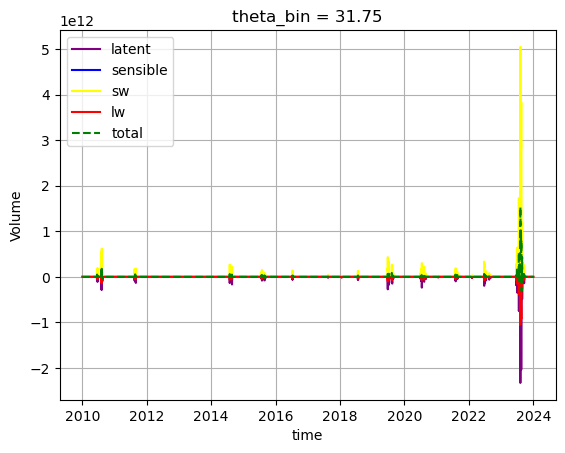

In [69]:
vols.omega_slhf.plot(label='latent', color='purple')
vols.omega_sshf.plot(label='sensible', color='blue')
vols.omega_ssr.plot(label='sw', color='yellow')
vols.omega_str.plot(label='lw', color='red')
vols.to_array().sum('variable').plot(label='total', color='green', linestyle='dashed')
plt.legend()
plt.ylabel('Volume')
#plt.ylim(-10,10)
plt.grid()
#plt.title('Transformation of isotherm 31.8˚C - ERA');

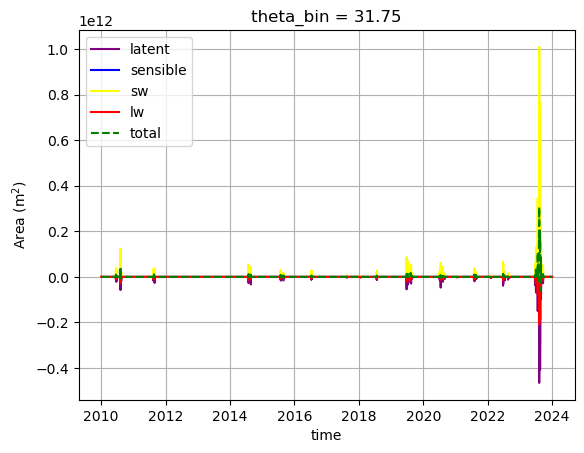

In [70]:
areas.omega_slhf.plot(label='latent', color='purple')
areas.omega_sshf.plot(label='sensible', color='blue')
areas.omega_ssr.plot(label='sw', color='yellow')
areas.omega_str.plot(label='lw', color='red')
areas.to_array().sum('variable').plot(label='total', color='green', linestyle='dashed')
plt.legend()
plt.ylabel(r'Area (m$^2$)')
#plt.ylim(-10,10)
plt.grid()
#plt.title('Transformation of isotherm 31.8˚C - ERA');

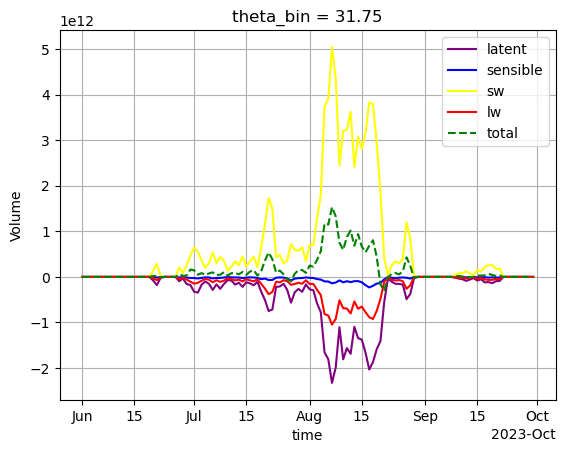

In [71]:
mhw = vols.sel(time=slice('2023-06', '2023-09'))

mhw.omega_slhf.plot(label='latent', color='purple')
mhw.omega_sshf.plot(label='sensible', color='blue')
mhw.omega_ssr.plot(label='sw', color='yellow')
mhw.omega_str.plot(label='lw', color='red')
mhw.to_array().sum('variable').plot(label='total', color='green', linestyle='dashed')
plt.legend()
plt.ylabel('Volume')
#plt.ylim(-10,10)
plt.grid()
#plt.title('Transformation of isotherm 31.8˚C - 2023');

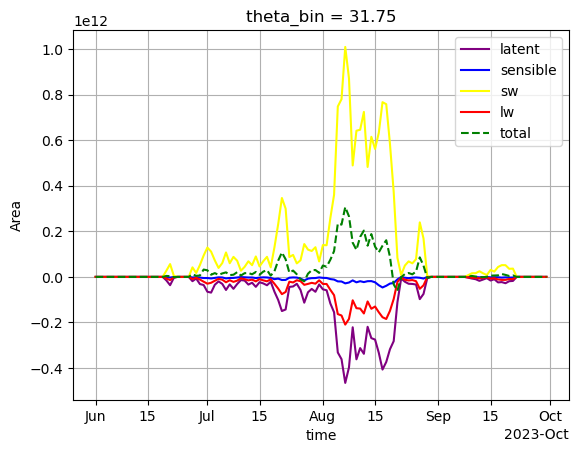

In [73]:
mhw = areas.sel(time=slice('2023-06', '2023-09'))

mhw.omega_slhf.plot(label='latent', color='purple')
mhw.omega_sshf.plot(label='sensible', color='blue')
mhw.omega_ssr.plot(label='sw', color='yellow')
mhw.omega_str.plot(label='lw', color='red')
mhw.to_array().sum('variable').plot(label='total', color='green', linestyle='dashed')
plt.legend()
plt.ylabel('Area')
#plt.ylim(-10,10)
plt.grid()
#plt.title('Transformation of isotherm 31.8˚C - 2023');

In [61]:
#since sw is the only explicit driver of the mhw, use ssr variable to get max vol value 
vols.omega_ssr.argmax().values

array(4966)

In [66]:
vols.omega_ssr[4966].values #similar to value reported in manuscript

array(5.04468448e+12)

In [67]:
#since sw is the only explicit driver of the mhw, use ssr variable to get max area value 
areas.omega_ssr.argmax().values

array(4966)

In [65]:
areas.omega_ssr[4966].values #similar to value reported in manuscript

array(1.0089369e+12)